In [2]:
import gzip
import gensim 
import logging 

from transformers import AutoModel,AutoTokenizer,pipeline

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
import pandas as pd
import numpy as np

In [4]:
df_train=pd.read_csv("data/train.csv") 
df_essays=pd.DataFrame(df_train["full_text"])
df_test=pd.read_csv("data/test.csv")   
y=df_train.drop(["text_id","full_text"],axis=1)  
essays=df_essays["full_text"]
essays=list(essays) 
#essays=" ".join(essays)  
#essays=('''"""''') +essays + ('''"""''')   
target_names=list(y)
df_train

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5
...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5


In [4]:
len(essays)

3911

In [5]:
essays[0]

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.\n\nThe hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.\n\nmost students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go t

In [6]:
# pre processa o texto
# gensim.utils.simple_preprocess (line)
PreprosEssay = list()
for i, essay in enumerate (essays):
  PreprosEssay.append(gensim.utils.simple_preprocess (essay))

In [7]:
#PreprosEssay[1]
len(PreprosEssay)

3911

# testando Word2Vec

In [8]:
# #model = gensim.models.Word2Vec (documents, size=150, window=10, min_count=2, workers=10)
# #model.train(documents,total_examples=len(documents),epochs=10)

# model = gensim.models.Word2Vec (PreprosEssay, size=150, window=10, min_count=2, workers=10)
# model.train(PreprosEssay,total_examples=len(PreprosEssay),epochs=10)

In [9]:
# dir(model)
# # model.cum_table
# #for word in PreprosEssay[1]:
# for word in PreprosEssay[1][:5]:
#   print(word, model[word])

In [10]:
# w1 = "dirty"
# model.wv.most_similar (positive=w1)#buscando as palavras mais similares

# model.wv.most_similar (positive=w1,topn=6)#tras os 6 valores mais proximos

# testando Doc2Vec

In [11]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(PreprosEssay)]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

2022-10-24 00:10:53,211 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2022-10-24 00:10:53,212 : INFO : built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)
2022-10-24 00:10:53,213 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)", 'datetime': '2022-10-24T00:10:53.213834', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.18363-SP0', 'event': 'created'}
2022-10-24 00:10:53,403 : INFO : collecting all words and their counts
2022-10-24 00:10:53,404 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2022-10-24 00:10:53,809 : INFO : collected 21111 word types and 3911 unique tags from a corpus of 3911 examples and 1621825 words
2022-10-24 00:10:53,81

2022-10-24 00:11:08,263 : INFO : EPOCH - 9 : training on 1621825 raw words (1128855 effective words) took 1.4s, 829269 effective words/s
2022-10-24 00:11:09,271 : INFO : EPOCH 10 - PROGRESS: at 77.45% examples, 873829 words/s, in_qsize 8, out_qsize 0
2022-10-24 00:11:09,531 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-24 00:11:09,549 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-24 00:11:09,552 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-24 00:11:09,555 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-24 00:11:09,557 : INFO : EPOCH - 10 : training on 1621825 raw words (1128735 effective words) took 1.3s, 876242 effective words/s
2022-10-24 00:11:09,558 : INFO : Doc2Vec lifecycle event {'msg': 'training on 16218250 raw words (11284523 effective words) took 15.1s, 747424 effective words/s', 'datetime': '2022-10-24T00:11:09.558992', 'gensim': '4.1.2', 'python': '3.9.12 (main

In [12]:
# from gensim.test.utils import common_texts
# from gensim.models.doc2vec import Doc2Vec, TaggedDocument


# halfEssays = np.array_split(PreprosEssay,2) #testando so com parte dos valores das essays

# documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(halfEssays[0])]
# model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

In [13]:
# len(halfEssays[0])

In [14]:
# documents[0]

In [15]:
# dir(model)

In [16]:
model.docvecs[0] # posição do documento

C:\Users\arthur\AppData\Local\Temp\ipykernel_13812\3726138103.py:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs[0] # posição do documento


array([-0.37849298,  0.36131036,  1.7935017 , -0.31978223, -0.85019755],
      dtype=float32)

In [17]:
# dir(model)

In [18]:
# dir(model.scan_vocab)

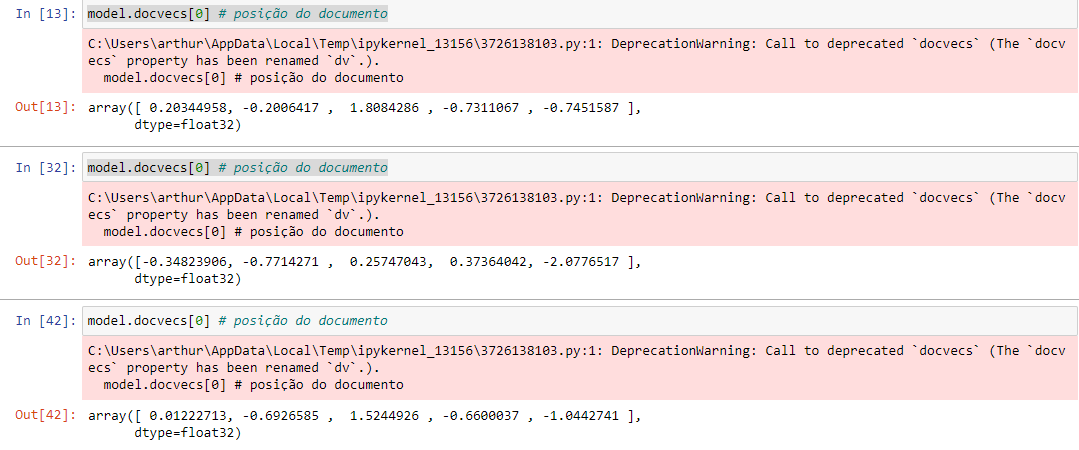

porque os resultados de documentos identicos geram representações vetoriais diferentes ?
resposta: https://stackoverflow.com/questions/50408740/gensim-doc2vec-im-gettting-different-vectors-from-documents-that-are-identical

In [19]:
model.infer_vector("this is the end".split())# extraindo representação vetorial dos modelos

array([-0.02243813,  0.01533613,  0.01339904,  0.04386268, -0.30353817],
      dtype=float32)

In [25]:
model.infer_vector(PreprosEssay[0])

array([-0.7574953 ,  0.15931675,  2.1944063 , -0.5147498 , -0.92636675],
      dtype=float32)

In [59]:
# df_novo = pd.DataFrame(model.docvecs,columns = ['EmbDoc1','EmbDoc2','EmbDoc3','EmbDoc4','EmbDoc5'])
#dir(model.docvecs)
# for i, doc in enumerate(model.dv):
#     print(doc)

# df_novo = pd.DataFrame({'EmbDoc1':model.dv[:,0],'EmbDoc2':model.dv[:,1],'EmbDoc3':model.dv[:,2],'EmbDoc4':model.dv[:,3],'EmbDoc5':model.dv[:,4]})
#model.dv[0][0]

df_novo = pd.DataFrame(columns = ['EmbDoc1','EmbDoc2','EmbDoc3','EmbDoc4','EmbDoc5'])
for i in range(model.dv.__len__()):
    df_novo.loc[i] = [model.dv[i][0],model.dv[i][1],model.dv[i][2],model.dv[i][3],model.dv[i][4]]
    
df_novo


,EmbDoc1,EmbDoc2,EmbDoc3,EmbDoc4,EmbDoc5
0,-0.378493,0.361310,1.793502,-0.319782,-0.850198
1,0.068057,1.106867,-0.153712,-0.823516,-1.784668
2,-0.984724,0.166770,1.674314,-0.708702,-0.818998
3,0.762911,1.347518,-0.571410,-1.322564,-2.055546
4,0.974610,0.220228,-0.367960,-0.001963,-1.740385
...,...,...,...,...,...
3906,-0.610828,-0.773336,0.336453,0.044648,-1.311844
3907,-0.922011,-1.887279,0.796840,-1.972311,-0.986654
3908,-1.340563,1.009742,-0.350708,-0.078652,-1.740720
3909,0.596326,0.041206,-1.647959,-1.225929,-2.136117


# testando bert do hugginface

In [2]:
model=AutoModel.from_pretrained('distilbert-base-uncased')
tokenizer=AutoTokenizer.from_pretrained('distilbert-base-uncased')
nlp=pipeline('feature-extraction',model=model,tokenizer=tokenizer)
features=nlp('o homem e foda patroa ') 
features

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

[[[-0.3510614037513733,
   0.05277644097805023,
   -0.0037025436758995056,
   -0.5903255343437195,
   -0.09914164990186691,
   -0.16946104168891907,
   0.14589104056358337,
   0.2929903268814087,
   -0.06027644872665405,
   -0.337838351726532,
   -0.2226753532886505,
   -0.03583592176437378,
   -0.21093904972076416,
   0.4716949164867401,
   0.06963025778532028,
   0.2575889527797699,
   0.02431461587548256,
   0.056492045521736145,
   0.26376140117645264,
   -0.20130965113639832,
   0.03919310122728348,
   -0.29048603773117065,
   0.03481893986463547,
   0.07653361558914185,
   -0.11067907512187958,
   -0.04716853052377701,
   0.14961960911750793,
   -0.03255379572510719,
   -0.061130061745643616,
   0.08034945279359818,
   0.012902069836854935,
   0.3619415760040283,
   -0.3599295914173126,
   -0.18716900050640106,
   -0.23019194602966309,
   -0.129873126745224,
   0.5869991183280945,
   -0.24679800868034363,
   0.06588920950889587,
   0.28686633706092834,
   -0.07440672814846039,
  

In [15]:
features=nlp("i like to eat cheese because it is good") 
np.array(features).shape

(1, 11, 768)

# simple tranformers
uma alternativa mais leve criada em cima dos tranformes originais da hugginface
https://towardsdatascience.com/simple-transformers-introducing-the-easiest-bert-roberta-xlnet-and-xlm-library-58bf8c59b2a3

In [1]:
!pip install simpletransformers

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.


  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21503 sha256=b6563eb2c680a79b30492aecfc0d5974c466c7663c705cc6e7ba9be7c4b63493
  Stored in directory: c:\users\arthur\appdata\local\pip\cache\wheels\e1\e8\83\ddea66100678d139b14bc87692ece57c6a2a937956d2532608
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=96fc65b3d191dfe9eb50faf538a283fafbdb3aebe6e1bb17c98424d93a8a8f44
  Stored in directory: c:\users\arthur\appdata\local\pip\cache\wheels\b7\0a\67\ada2a22079218c75a88361c0782855cc72aebc4d18d0289d05
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=96756dba0d166fc18439aa433ee9d00255de8cd8ff534cd78819af9e20b4d2aa
  Stored in directory: c:\users\arthur\appdata\local\pip\cache\wheels\e2\a5\92\2c80d1928733611c2747a9820e1324a6835524d9411510c142
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=1958

## word embedding

In [15]:
from simpletransformers.language_representation import RepresentationModel
        
sentences = ["Machine Learning and Deep Learning are part of AI", "Data Science will excel in future"]#deve ser sempre uma lista

model = RepresentationModel(
        model_type="bert",
        model_name="bert-base-uncased",
        use_cuda=False #habilta e dasibilita uso do cuda/ como nao tenho gpu desabilitei
    )

word_vectors = model.encode_sentences(sentences, combine_strategy=None)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTextRepresentation: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForTextRepresentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTextRepresentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [16]:
word_vectors.shape

(2, 11, 768)

resultado e (n exemplos(documentos),numero de tokens, numero de features pra cada token) o numero de tokens e de acordo com o processamento do bertdepois que ele remove stopwords e faz o processamento

## sentence embedding

In [7]:
from simpletransformers.language_representation import RepresentationModel
sentences = ["Machine Learning and Deep Learning are part of AI", "Data Science will excel in future"]#deve ser sempre uma lista
model = RepresentationModel(
        model_type="bert",
        model_name="bert-base-uncased",
        use_cuda=False #desabilitei o cuda
    )
sentence_vectors = model.encode_sentences(sentences, combine_strategy="mean")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTextRepresentation: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTextRepresentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTextRepresentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
sentence_vectors.shape

(2, 768)

resultado vai ser (n exemplos(documentos), quantidade de features) no caso quando e alterado a combine_strategy para "mean", ele tira a media entre as palavras presentes na sentença e faz um embed de sentença(documento)

# testing in bert in data

In [8]:
# df_sample=df_relevant.sample(frac=0.2) 
# df_sample

In [9]:
# y_sample=df_sample.loc[:,target_names] 
# y_sample

y_sample=df_train.loc[:,target_names] 
y_sample

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,3.5,3.5,3.0,3.0,4.0,3.0
1,2.5,2.5,3.0,2.0,2.0,2.5
2,3.0,3.5,3.0,3.0,3.0,2.5
3,4.5,4.5,4.5,4.5,4.0,5.0
4,2.5,3.0,3.0,3.0,2.5,2.5
...,...,...,...,...,...,...
3906,2.5,3.0,3.0,3.5,2.5,2.5
3907,4.0,4.0,4.0,4.0,3.5,3.0
3908,2.5,3.0,3.0,3.0,3.5,3.0
3909,4.0,4.5,4.5,4.0,4.5,4.5


In [10]:
df_essays

,full_text
0,I think that students would benefit from learn...
1,When a problem is a change you have to let it ...
2,"Dear, Principal\n\nIf u change the school poli..."
3,The best time in life is when you become yours...
4,Small act of kindness can impact in other peop...
...,...
3906,I believe using cellphones in class for educat...
3907,"Working alone, students do not have to argue w..."
3908,"""A problem is a chance for you to do your best..."
3909,Many people disagree with Albert Schweitzer's ...


In [19]:
df_essays['full_text']

<bound method IndexOpsMixin.tolist of 0       I think that students would benefit from learn...
1       When a problem is a change you have to let it ...
2       Dear, Principal\n\nIf u change the school poli...
3       The best time in life is when you become yours...
4       Small act of kindness can impact in other peop...
                              ...                        
3906    I believe using cellphones in class for educat...
3907    Working alone, students do not have to argue w...
3908    "A problem is a chance for you to do your best...
3909    Many people disagree with Albert Schweitzer's ...
3910    Do you think that failure is the main thing fo...
Name: full_text, Length: 3911, dtype: object>

In [20]:
from simpletransformers.language_representation import RepresentationModel
        
#sentences = ["Machine Learning and Deep Learning are part of AI", "Data Science will excel in future"]#deve ser sempre uma lista

sentences = df_essays['full_text']

model = RepresentationModel(
        model_type="bert",
        model_name="bert-base-uncased",
        use_cuda=False #habilta e dasibilita uso do cuda/ como nao tenho gpu desabilitei
    )

word_vectors = model.encode_sentences(sentences, combine_strategy=None)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTextRepresentation: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForTextRepresentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTextRepresentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [21]:
word_vectors.shape

(3911, 128, 768)

In [22]:
model = RepresentationModel(
        model_type="bert",
        model_name="bert-base-uncased",
        use_cuda=False #desabilitei o cuda
    )
sentence_vectors = model.encode_sentences(sentences, combine_strategy="mean")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTextRepresentation: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForTextRepresentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTextRepresentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [24]:
sentence_vectors.shape

(3911, 768)

In [26]:
df_bertRes = pd.DataFrame(sentence_vectors)
df_bertRes

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.157434,-0.071965,0.301544,0.150501,0.178935,-0.210693,0.304159,0.576990,-0.061147,-0.621962,...,-0.071889,-0.087219,0.170918,-0.068744,-0.118077,0.180905,-0.003418,-0.177704,0.221270,-0.045998
1,-0.228656,-0.072586,0.237567,-0.129438,0.136184,-0.118966,0.343063,0.638887,-0.258532,-0.587048,...,0.113347,-0.273595,0.160103,-0.146419,-0.050796,0.166094,0.130930,-0.208725,-0.027670,-0.112566
2,0.098509,0.122664,0.208846,-0.016147,0.016698,-0.355194,0.545392,0.696408,-0.198853,-0.306966,...,-0.014916,-0.063243,0.198867,0.084248,-0.124246,0.063151,0.085416,-0.263730,0.194559,0.018709
3,0.098849,0.196622,0.132102,-0.016262,0.145937,-0.118173,0.531471,0.454036,-0.191437,-0.554134,...,0.149134,-0.199233,0.211807,-0.196129,-0.195298,0.038674,0.270910,-0.181980,0.142690,0.043665
4,-0.111876,-0.038578,0.362585,-0.180084,0.300487,-0.164057,0.252291,0.629546,-0.004195,-0.676494,...,-0.048436,-0.375263,0.302306,-0.014976,-0.089475,0.272385,-0.073600,-0.561132,0.153970,-0.141076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,0.099839,0.320564,0.339236,0.040822,0.235228,-0.201500,0.269392,0.570060,0.209663,-0.296035,...,-0.074849,-0.124895,0.110616,0.001362,-0.013810,-0.011996,-0.043959,-0.274519,0.057057,-0.038691
3907,-0.192717,0.247343,0.164852,-0.024664,0.085027,-0.145872,0.238899,0.368168,-0.051613,-0.424298,...,0.171951,-0.124264,0.175988,-0.193829,-0.192613,-0.058245,0.057661,-0.128007,0.210623,0.119885
3908,-0.167818,0.116684,0.210715,-0.027492,0.116754,-0.192524,0.410625,0.527775,0.092158,-0.400574,...,-0.082660,-0.237127,0.144370,-0.176326,-0.048133,0.276113,0.201276,-0.044668,0.065989,0.113079
3909,-0.055939,0.176859,-0.021450,-0.038923,-0.032921,-0.120585,0.351970,0.708807,-0.098455,-0.211760,...,0.088632,-0.141484,0.139134,-0.203824,-0.071866,0.164397,0.365998,0.016324,0.092795,0.068693


In [28]:
from sklearn.model_selection import cross_val_predict,cross_val_score,train_test_split
from sklearn.ensemble import RandomForestRegressor 

from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.linear_model import SGDRegressor

from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neighbors import RadiusNeighborsRegressor 

from sklearn.ensemble import AdaBoostRegressor

from sklearn.multioutput import MultiOutputRegressor,MultiOutputClassifier

from sklearn.metrics import r2_score,confusion_matrix,ConfusionMatrixDisplay 


In [29]:
model2 =MultiOutputRegressor(RandomForestRegressor(max_depth=100))

In [ ]:
predictions_sample=cross_val_predict(model2,df_bertRes,y_sample,cv=10,n_jobs=6)